# Experiment 1

In [146]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ks_2samp, mannwhitneyu

pd.options.display.float_format = '{:.3f}'.format

In [79]:
!ls

Exp1.ipynb       log_out.csv      returns.csv      speed.csv
Exp2.ipynb       main.py          returns_in.csv   volume.csv
Exp3.ipynb       new_data.csv     returns_out.csv
log_in.csv       packets.csv      returns_stable.R


In [80]:
def read_data(filename):
    data = pd.read_csv(filename)
    data.rename(columns={'Time': 'time', 'IN Traffic': 'in', 'OUT Traffic': 'out'}, inplace=True)
    data['time'] =  pd.to_datetime(data['time'], format='%b-%d-%y %H:%M')
    return data


In [86]:
packets_data = read_data('packets.csv')

Working with packets data

In [87]:
packets_data = packets_data.iloc[::-1]
packets_data.reset_index(inplace=True)
packets_data.drop('index', axis=1, inplace=True)

In [88]:
packets_data.head()

,time,in,out
0,2021-02-08 11:32:00,11882,17265
1,2021-02-08 11:33:00,16104,15204
2,2021-02-08 11:34:00,14514,28119
3,2021-02-08 11:35:00,18089,30348
4,2021-02-08 11:36:00,110958,149672


In [89]:
packets_data.describe()

,in,out
count,529.000,529.000
mean,69028.087,99725.648
std,195073.441,232654.303
min,3297.000,3363.000
25%,14686.000,23510.000
50%,25476.000,47925.000
75%,55640.000,96182.000
max,2592923.000,3311913.000


In [90]:
def plot_dist_time(data, figsize=(10, 5), ylabel='', draw_line=False):
    plt.figure(figsize=figsize)
    plt.plot(data)
    if draw_line:
        alpha = (data[len(data) - 1] - data[0]) / len(data)
        plt.plot(alpha*np.arange(0, len(data) - 1), color='red', linewidth=0.5)
    plt.ylabel(ylabel)
    plt.xlabel('Time (min)')
    plt.grid()
    plt.show()

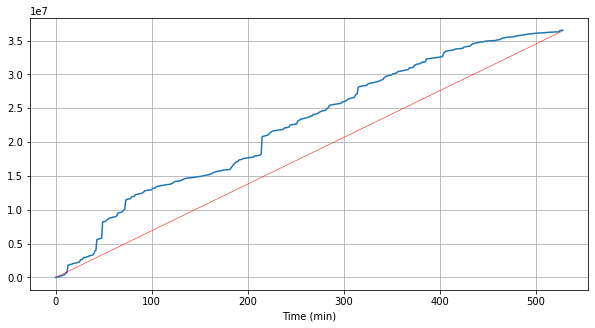

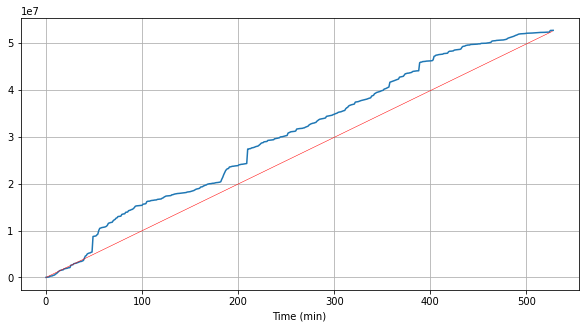

In [91]:
plot_dist_time(np.cumsum(packets_data['in']), draw_line=True)
plot_dist_time(np.cumsum(packets_data['out']), draw_line=True)

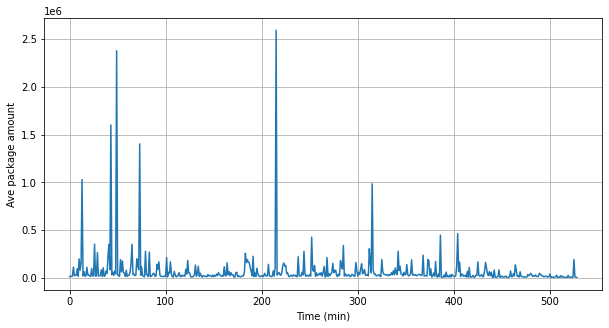

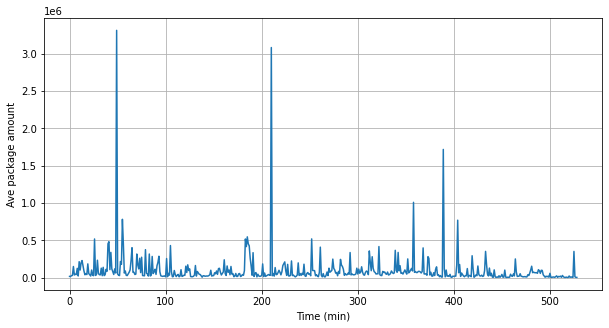

In [92]:
plot_dist_time(packets_data['in'], ylabel='Ave package amount')
plot_dist_time(packets_data['out'], ylabel='Ave package amount')

In [93]:
returns_in = np.log(packets_data.iloc[1:]['in'].values/packets_data.iloc[:-1]['in'].values)
returns_in[:5]

array([ 0.30404304, -0.10395399,  0.22019032,  1.81384773, -1.6171098 ])

In [94]:
returns_out = np.log(packets_data.iloc[1:]['out'].values/packets_data.iloc[:-1]['out'].values)
returns_out[:5]

array([-0.12712278,  0.61488695,  0.07628511,  1.59571562, -1.41571981])

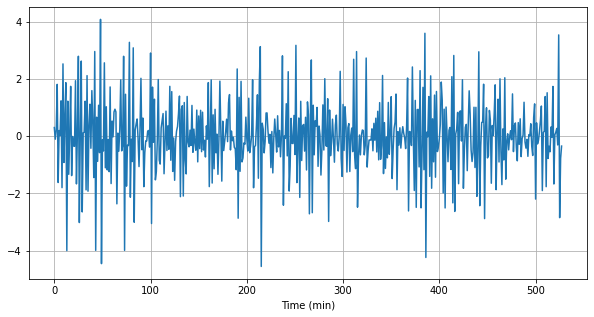

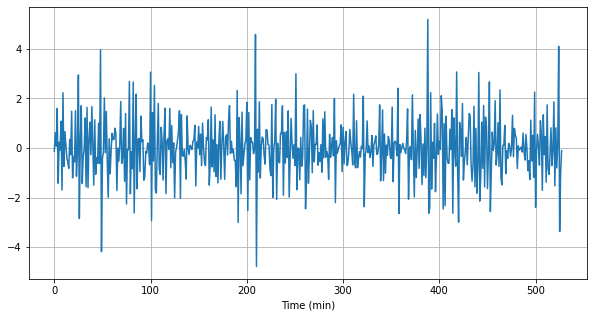

In [95]:
plot_dist_time(returns_in)
plot_dist_time(returns_out)

In [96]:
def plot_hist(data, figsize=(10, 5), bins=50):
    plt.figure(figsize=figsize)
    plt.hist(data, bins=bins)
    plt.ylabel('Count')
    plt.xlabel('r(t)')
    plt.grid()
    plt.show()

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


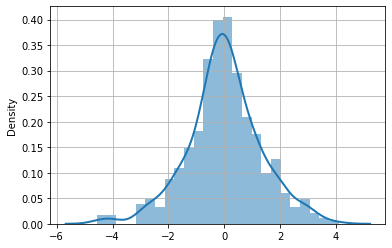

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


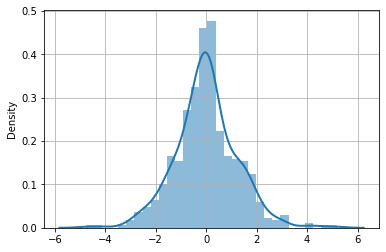

In [97]:
sns.distplot(returns_in, kde = True,
                 hist_kws = {'alpha': 0.5},
                 kde_kws = {'linewidth': 2})
plt.grid()
plt.show()

sns.distplot(returns_out, kde = True,
                 hist_kws = {'alpha': 0.5},
                 kde_kws = {'linewidth': 2})
plt.grid()
plt.show()

In [98]:
import levy

In [100]:
levy.fit_levy(returns_in) # -- Fit a stable distribution to x

(par=0, alpha=1.87, beta=-0.17, mu=0.03, sigma=0.87, 890.3982044043439)

In [102]:
levy.fit_levy(returns_out)

(par=0, alpha=1.85, beta=0.19, mu=-0.04, sigma=0.79, 848.2281432190919)

In [106]:
pd.DataFrame(returns_in).to_csv('returns.csv')

In [143]:
def compare_real_and_fake(real, fake, title='', bins=50):
    plt.figure(figsize=(7, 5))
#     plt.hist(real, bins, alpha=0.5, label='Real data for r(t)', density=True)
#     plt.hist(fake, bins, alpha=0.5, label='Generated data for r(t)', density=True)
    sns.distplot(real, kde = True,
                 hist_kws = {'alpha': 0.5},
                 kde_kws = {'linewidth': 2},
                 label = 'Real data for r(t)')
    sns.distplot(fake, kde = True,
                 hist_kws = {'alpha': 0.5},
                 kde_kws = {'linewidth': 2},
                 label = 'Generated data for r(t)')
    plt.title(title)
    plt.xlim((-10, 10))
    plt.legend(loc='upper right')
    plt.show()
    
    print('KS-test: ', ks_2samp(real, fake))
    print('U-test: ', mannwhitneyu(real, fake))


In [147]:
ml = levy.random(1.87100008, -0.16590611, 0.02826065, 0.86967891, shape=(2000,))
it = levy.random(1.8228606, -0.1300519, 0.0184439, 0.8187967, shape=(2000,))
qu = levy.random(1.502000000, -0.078000000, -0.004564484, 0.728036413, shape=(2000,))
mm = levy.random(1.7109627571, 0.0453520972, -0.0004027826, 0.8312287066, shape=(2000,))

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


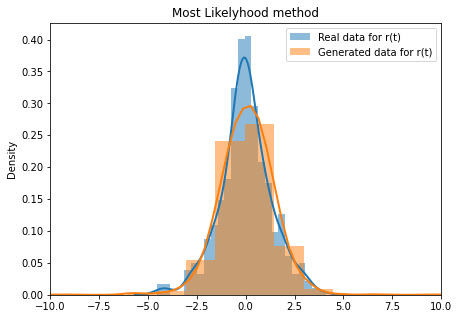

KS-test:  KstestResult(statistic=0.07407575757575757, pvalue=0.019239498641059116)
U-test:  MannwhitneyuResult(statistic=511042.0, pvalue=0.12783174201117897)


/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


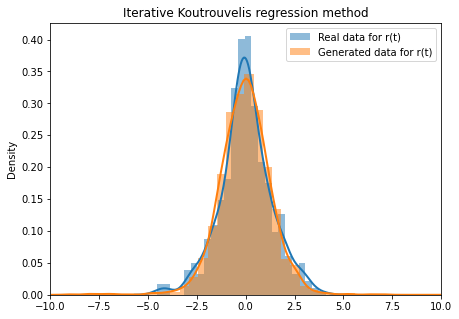

KS-test:  KstestResult(statistic=0.05274242424242424, pvalue=0.1877603731126669)
U-test:  MannwhitneyuResult(statistic=520476.0, pvalue=0.30701908544206996)


/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


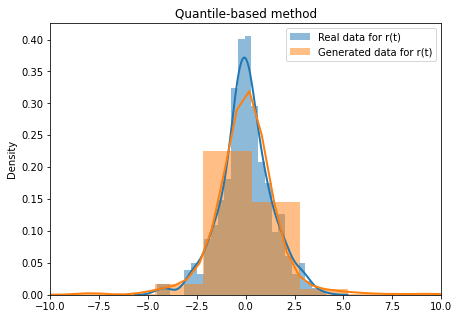

KS-test:  KstestResult(statistic=0.030348484848484847, pvalue=0.8229310232168856)
U-test:  MannwhitneyuResult(statistic=524150.0, pvalue=0.39818766528276395)


/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


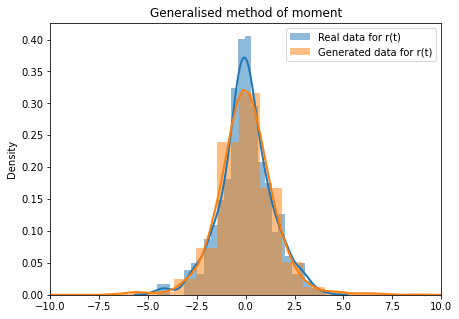

KS-test:  KstestResult(statistic=0.04774242424242424, pvalue=0.28624115814511764)
U-test:  MannwhitneyuResult(statistic=525255.0, pvalue=0.4270184157738136)


In [148]:
compare_real_and_fake(returns_in, ml, 'Most Likelyhood method')
compare_real_and_fake(returns_in, it, 'Iterative Koutrouvelis regression method')
compare_real_and_fake(returns_in, qu, 'Quantile-based method')
compare_real_and_fake(returns_in, mm, 'Generalised method of moment')

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

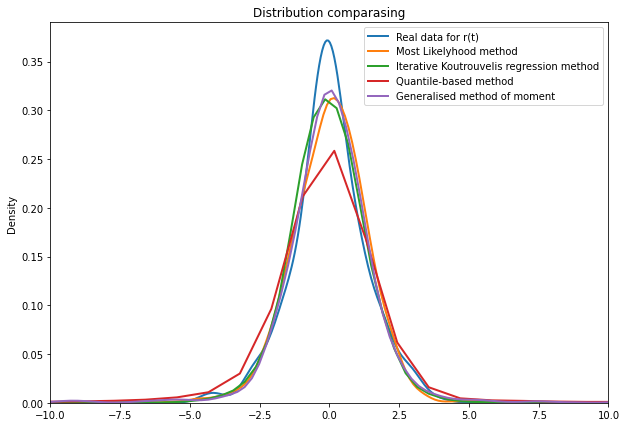

In [135]:
    plt.figure(figsize=(10, 7))
#     plt.hist(real, bins, alpha=0.5, label='Real data for r(t)', density=True)
#     plt.hist(fake, bins, alpha=0.5, label='Generated data for r(t)', density=True)
    sns.distplot(returns_in, hist=False, kde = True,
                 hist_kws = {'alpha': 0.5},
                 kde_kws = {'linewidth': 2},
                 label = 'Real data for r(t)')
    sns.distplot(ml, hist=False, kde = True,
                 hist_kws = {'alpha': 0.5},
                 kde_kws = {'linewidth': 2},
                 label = 'Most Likelyhood method')
    sns.distplot(it, hist=False, kde = True,
                 hist_kws = {'alpha': 0.5},
                 kde_kws = {'linewidth': 2},
                 label = 'Iterative Koutrouvelis regression method')
    sns.distplot(qu, hist=False, kde = True,
                 hist_kws = {'alpha': 0.5},
                 kde_kws = {'linewidth': 2},
                 label = 'Quantile-based method')
    sns.distplot(mm, hist=False, kde = True,
                 hist_kws = {'alpha': 0.5},
                 kde_kws = {'linewidth': 2},
                 label = 'Generalised method of moment')
    plt.title('Distribution comparasing')
    plt.xlim((-10, 10))
    plt.legend(loc='upper right')
    plt.show()

In [136]:
!pip3 install hurst

In [132]:
import hurst

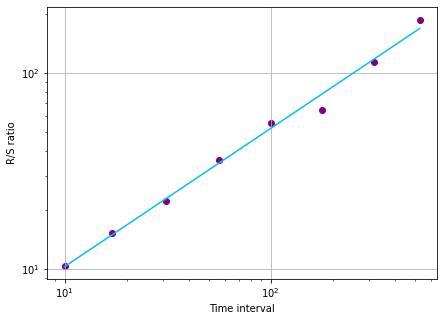

H=0.7046, c=2.0317


In [45]:
H, c, data = hurst.compute_Hc(packets_data['in'], kind='change', simplified=True)

# Plot
f, ax = plt.subplots(figsize=(7, 5))
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

In [46]:
H

0.704580022259636